# Chapitre 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom, expon, norm, poisson, uniform
from scipy.stats import chi2_contingency, shapiro
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower

## 4.1.1 Concepts clés

### 4.1.1.2 Notions de population et d'échantillon

In [2]:
population = np.arange(1, 10001)  # Population de 10000 éléments
taille_echantillon = 1000
echantillon = np.random.choice(population, size=taille_echantillon, replace=False)

In [3]:
echantillon.shape

(1000,)

In [4]:
# Supposons que nous ayons observé 300 succès sur un échantillon de 1000
n = 1000
p_echantillon = 0.3

# Calcul de l'intervalle de confiance à 95%
marge_erreur = stats.norm.ppf(0.975) * np.sqrt(p_echantillon * (1 - p_echantillon) / n)
intervalle_confiance = (p_echantillon - marge_erreur, p_echantillon + marge_erreur)

print(f"Intervalle de confiance à 95% : {intervalle_confiance}")

Intervalle de confiance à 95% : (0.27159742349106747, 0.3284025765089325)


## 4.1.2 Lois de probabilités statistiques

### Loi uniforme

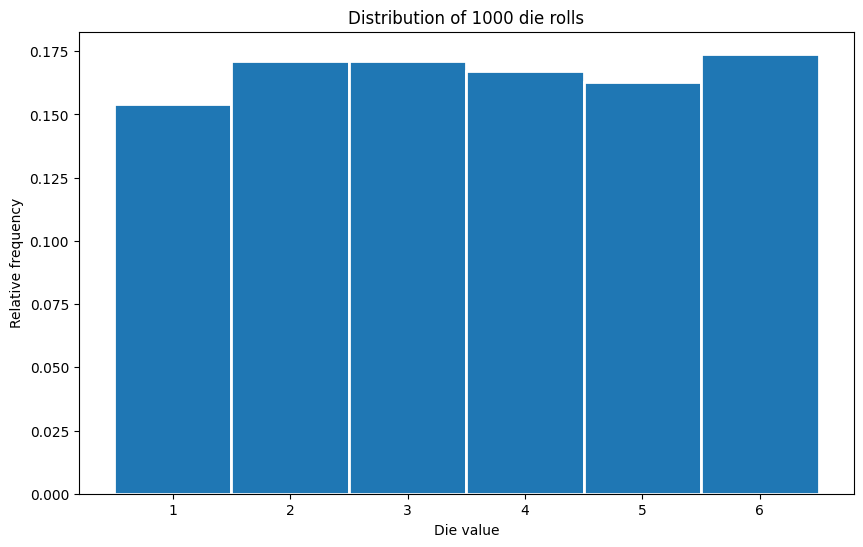

In [ ]:
import matplotlib.pyplot as plt  
import numpy as np  
  
# Simulation of 1000 rolls of a 6-sided die  
rolls = np.random.randint(1, 7, size=1000)  
  
# Creating the histogram  
plt.figure(figsize=(10, 6))  
plt.hist(rolls, 
         bins=np.arange(1, 8) - 0.5, 
         density=True, 
         edgecolor='white',
         linewidth=2.0)  
plt.title('Distribution of 1000 die rolls')  
plt.xlabel('Die value')  
plt.ylabel('Relative frequency')  

# To clearly show discrete values  
plt.xticks(range(1, 7))  

plt.savefig('./img/04_01.png')  

plt.show()

In [14]:
us = ['zen', 'tom']
fr = ['dub', 'mor']

all_stars = us.copy()
all_stars+=fr
all_stars

['zen', 'tom', 'dub', 'mor']

### Loi binomiale

Probability: 0.1550453595742519


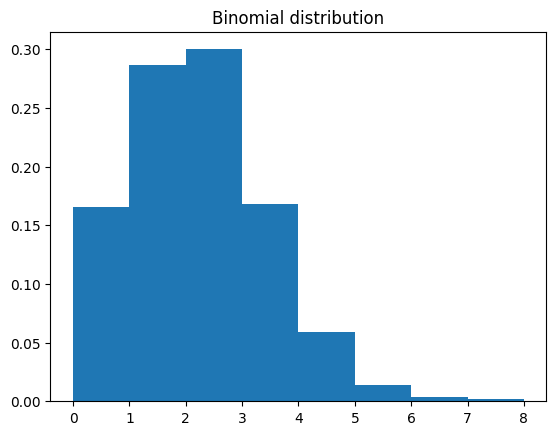

In [6]:
# Calcul de la probabilité d'obtenir exactement 3 fois le chiffre 6 en lançant un dé à six faces 10 fois
probability = binom.pmf(k=3, n=10, p=1/6)
print("Probability:", probability)

# Génération de 1000 échantillons distribués selon une loi binomiale B(10,1/6)
samples = binom.rvs(n=10, p=1/6, size=1000)

# Tracé de l'histogramme des échantillons
plt.hist(samples, bins=range(min(samples), max(samples)+2), density=True)
plt.title('Binomial distribution')

# Affichage du graphique
plt.savefig('./img/04_02.png')
plt.show()

### Loi de Poisson

Probability: 0.10081881344492458


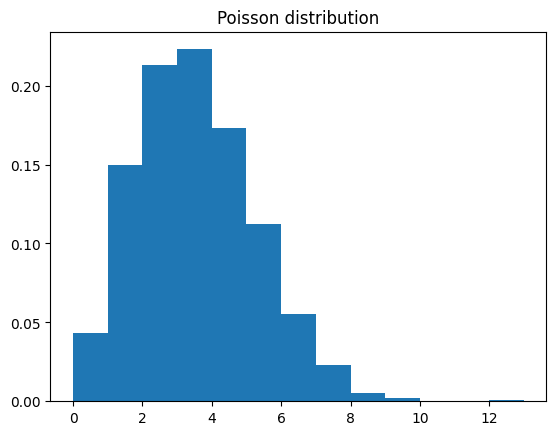

In [7]:
# Calcul de la probabilité de recevoir exactement 5 appels pendant une heure donnée, en moyenne 3 appels par heure
probability = poisson.pmf(k=5, mu=3)
print("Probability:", probability)

# Génération de 1000 échantillons distribués selon une loi de Poisson P(3)
samples = poisson.rvs(mu=3, size=1000)

# Tracé de l'histogramme des échantillons
plt.hist(samples, bins=range(min(samples), max(samples)+2), density=True)
plt.title('Poisson distribution')

# Affichage du graphique
plt.savefig('./img/04_03.png')
plt.show()

### Loi normale

Probability: 0.2524925375469229


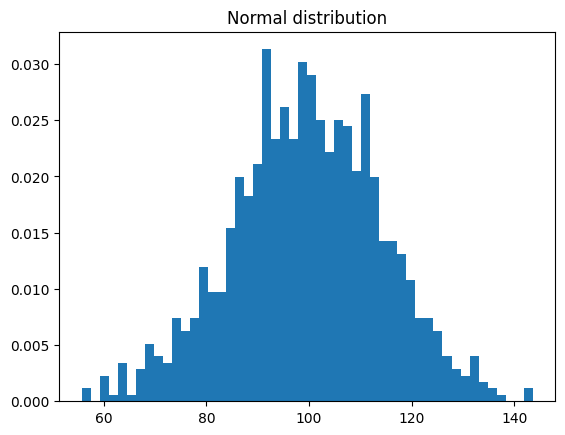

In [8]:
# Calcul de la probabilité qu'un élève choisi au hasard ait un score supérieur à 110, si la moyenne du score est de 100 et l'écart type est de 15
probability = 1 - norm.cdf(x=110, loc=100, scale=15)
print("Probability:", probability)

# Génération de 1000 échantillons distribués selon une loi normale N(100,15^2)
samples = norm.rvs(loc=100, scale=15, size=1000)

# Tracé de l'histogramme des échantillons
plt.hist(samples, bins=50, density=True)
plt.title('Normal distribution')

# Affichage du graphique
plt.savefig('./img/04_04.png')
plt.show()

### Loi exponentielle

Mean: 0.3333333333333333


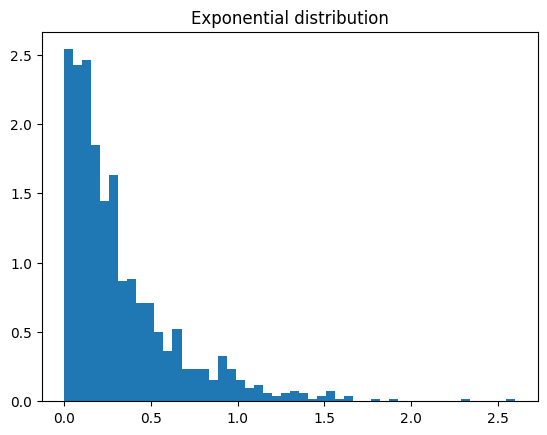

In [9]:
# Calcul de l'espérance du temps d'attente jusqu'au prochain appel, si vous recevez en moyenne 3 appels par heure
mean = 1 / 3
print("Mean:", mean)

# Génération de 1000 échantillons distribués selon une loi exponentielle Exp(3)
samples = expon.rvs(loc=0, scale=1/3, size=1000)

# Tracé de l'histogramme des échantillons
plt.hist(samples, bins=50, density=True)
plt.title('Exponential distribution')

# Affichage du graphique
plt.savefig('./img/04_05.png')
plt.show()

### 4.2.1.1 Indicateurs de position

#### 4.2.1.1.1 Moyenne

Mean: 164.38
Median: 47.50


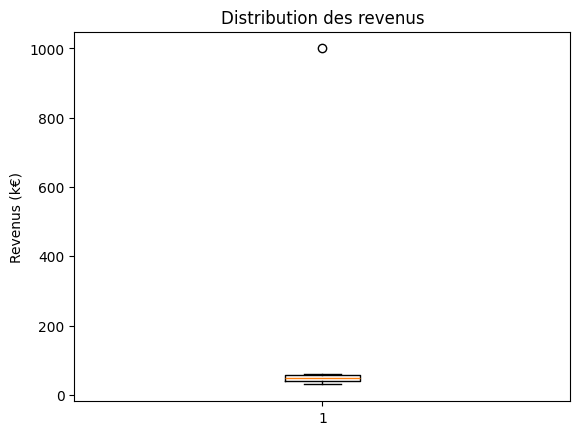

In [11]:
# Income data (in thousands of euros)
incomes = [30, 35, 40, 45, 50, 55, 60, 1000]

mean = np.mean(incomes)
median = np.median(incomes)

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")

plt.boxplot(incomes)
plt.title("Distribution des revenus")
plt.ylabel("Revenus (k€)")
plt.show()

### 4.2.1.2 Indicateurs de dispersion

**Ecart type**

In [12]:
# Scores data
scores = np.array([80, 75, 90, 82, 86, 78, 88, 92, 85, 79])

mean = np.mean(scores)
std_dev = np.std(scores, ddof=1)

print(f"Mean of the scores: {mean:.2f}")
print(f"Standard deviation of the scores: {std_dev:.2f}")

interval_68 = (mean - std_dev, mean + std_dev)
print("Interval containing about 68% of the scores: {:.2f}, {:.2f}".format(*interval_68))

Mean of the scores: 83.50
Standard deviation of the scores: 5.58
Interval containing about 68% of the scores: 77.92, 89.08


**Variance**

In [13]:
# Scores data
scores = np.array([80, 75, 90, 82, 86, 78, 88, 92, 85, 79])

mean = np.mean(scores)
variance = np.var(scores, ddof=1)  # ddof=1 for sample variance

print(f"Mean of the scores: {mean:.2f}")
print(f"Variance of the scores: {variance:.2f}")

Mean of the scores: 83.50
Variance of the scores: 31.17


**MAD**

In [14]:
import numpy as np

# Scores data
scores = np.array([80, 75, 90, 82, 86, 78, 88, 92, 85, 79])
mad = np.mean(np.abs(scores - np.mean(scores)))

print(f"Mean of the scores: {np.mean(scores):.2f}")
print(f"Mean Absolute Deviation (MAD): {mad:.2f}")

Mean of the scores: 83.50
Mean Absolute Deviation (MAD): 4.70


### 4.2.1.2.4 Estimateurs basés sur les percentiles

In [15]:
# Generate a dataset
data = np.random.normal(loc=100, scale=20, size=1000)

# Calculate quartiles and IQR
Q1 = np.percentile(data, 25)
Q2 = np.percentile(data, 50)  # median
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data < lower_bound) | (data > upper_bound)]

print(f"Q1: {Q1:.2f}")
print(f"Median: {Q2:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Number of outliers: {len(outliers)}")


Q1: 85.64
Median: 99.52
Q3: 113.62
IQR: 27.98
Number of outliers: 7


## 4.2.2 Analyse bivariée

### 4.2.2.1 Corrélation entre variables quantitatives

### Pearson

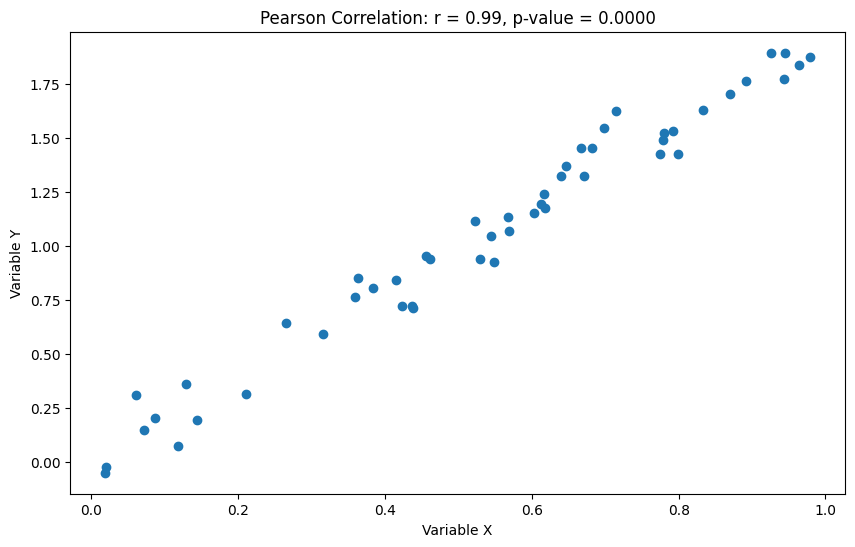

Pearson correlation coefficient: 0.99
P-value: 0.0000


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate data
np.random.seed(0)
x = np.random.rand(50)
y = 2 * x + np.random.normal(0, 0.1, 50)

# Calculate Pearson correlation
r, p_value = stats.pearsonr(x, y)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.title(f"Pearson Correlation: r = {r:.2f}, p-value = {p_value:.4f}")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.savefig('./img/04_06.png')
plt.show()

print(f"Pearson correlation coefficient: {r:.2f}")
print(f"P-value: {p_value:.4f}")


### Spearman

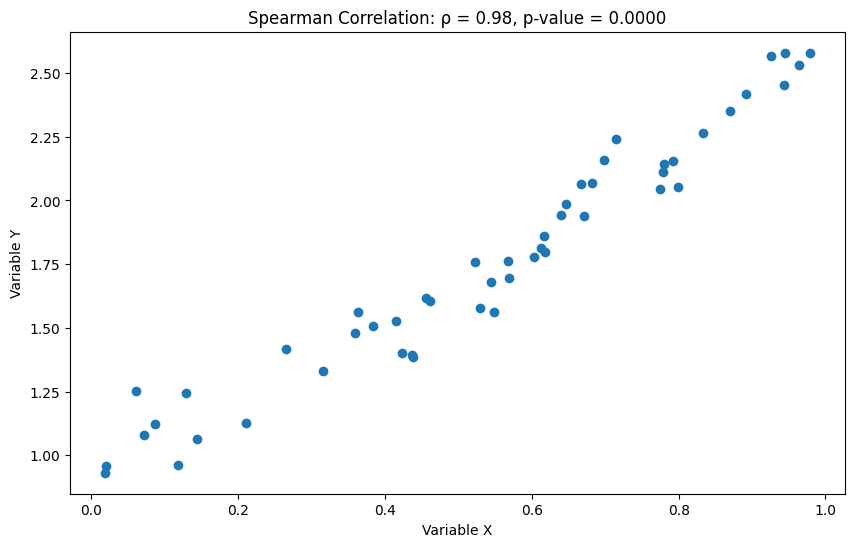

Spearman correlation coefficient: 0.98
P-value: 0.0000


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate data
np.random.seed(0)
x = np.random.rand(50)
y = np.exp(x) + np.random.normal(0, 0.1, 50)

# Calculate Spearman correlation
rho, p_value = stats.spearmanr(x, y)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.title(f"Spearman Correlation: ρ = {rho:.2f}, p-value = {p_value:.4f}")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.savefig('./img/04_07.png')
plt.show()

print(f"Spearman correlation coefficient: {rho:.2f}")
print(f"P-value: {p_value:.4f}")


### Person vs Spearman

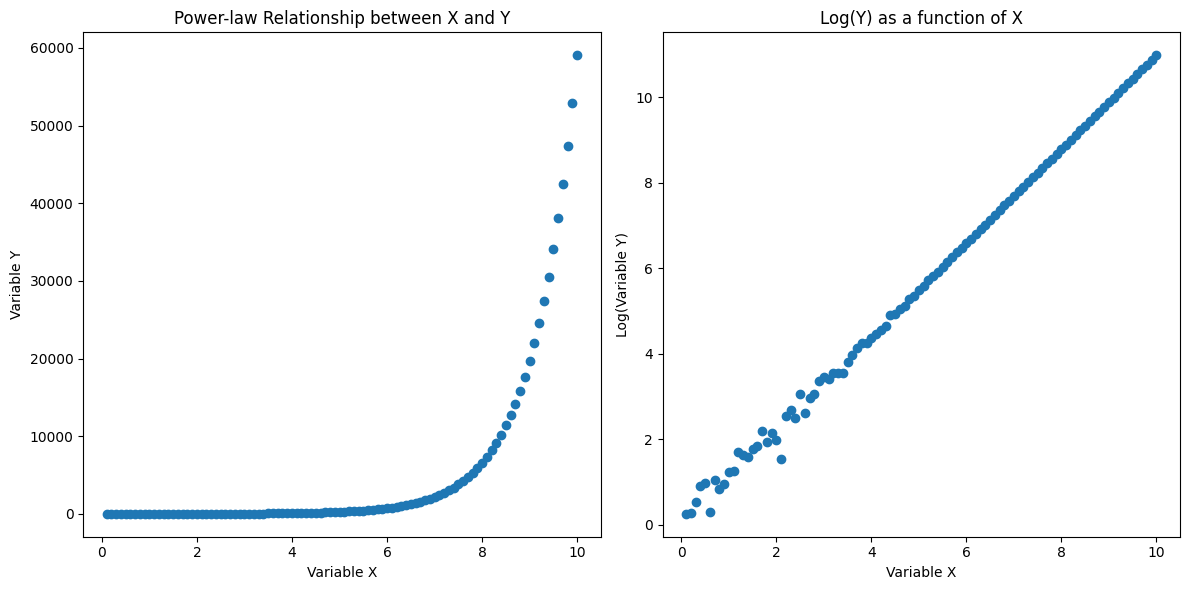

Pearson correlation coefficient: 0.67
P-value (Pearson): 0.0000
Spearman correlation coefficient: 1.00
P-value (Spearman): 0.0000


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate power-law distributed data
np.random.seed(0)
x = np.linspace(0.1, 10, 100)
y = 3**x + np.random.normal(0, x, 100)  # Power-law with noise proportional to x

# Ensure all y values are positive
y = np.abs(y)

# Calculate Pearson and Spearman correlations
r_pearson, p_pearson = stats.pearsonr(x, y)
rho_spearman, p_spearman = stats.spearmanr(x, y)

# Visualize the data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.title("Power-law Relationship between X and Y")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

plt.subplot(1, 2, 2)
plt.scatter(x, np.log(y))
plt.title("Log(Y) as a function of X")
plt.xlabel("Variable X")
plt.ylabel("Log(Variable Y)")

plt.tight_layout()
plt.savefig('./img/04_08.png')
plt.show()

print(f"Pearson correlation coefficient: {r_pearson:.2f}")
print(f"P-value (Pearson): {p_pearson:.4f}")
print(f"Spearman correlation coefficient: {rho_spearman:.2f}")
print(f"P-value (Spearman): {p_spearman:.4f}")


#### 4.2.2.2.1 Tableau de contingence

Contingency Table:
Conversion   No  Yes
Device              
Desktop     262   29
Mobile      473   44
Tablet      170   22


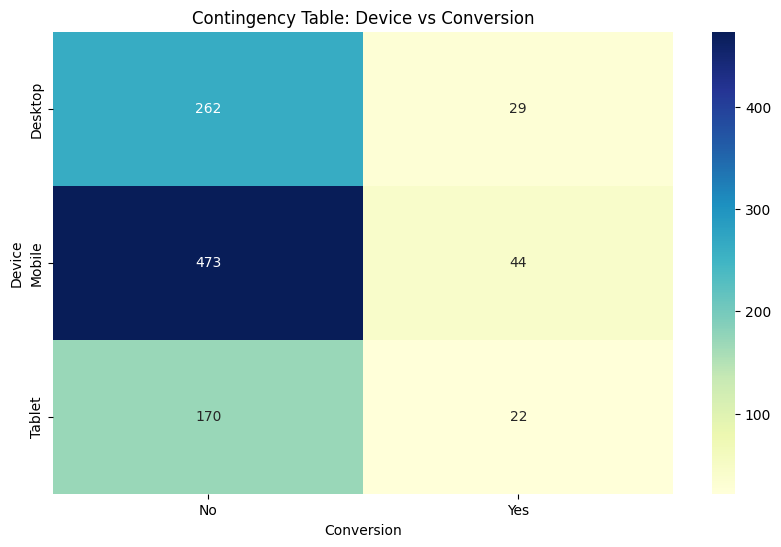


Conversion rates by device:
Device
Desktop     9.965636
Mobile      8.510638
Tablet     11.458333
dtype: float64


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(0)
n_observations = 1000
devices = np.random.choice(['Mobile', 'Tablet', 'Desktop'], n_observations, p=[0.5, 0.2, 0.3])
conversions = np.random.choice(['Yes', 'No'], n_observations, p=[0.1, 0.9])

# Create DataFrame
df = pd.DataFrame({'Device': devices, 'Conversion': conversions})

# Create contingency table
contingency_table = pd.crosstab(df['Device'], df['Conversion'])

print("Contingency Table:")
print(contingency_table)

# Visualize contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table: Device vs Conversion')
plt.savefig('./img/04_09.png')
plt.show()

# Calculate conversion rates by device
conversion_rates = contingency_table['Yes'] / (contingency_table['Yes'] + contingency_table['No']) * 100
print("\nConversion rates by device:")
print(conversion_rates)


#### 4.2.2.2.2 Test du chi-deux d'indépendance

In [20]:
# Create a contingency table
contingency_table = np.array([[100, 50], [80, 70]])

# Perform the chi-squared test
statistic, p_value, degrees_of_freedom, expected_values = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {statistic:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {degrees_of_freedom}")

Chi-squared statistic: 5.01
P-value: 0.0251
Degrees of freedom: 1


### 4.2.2.3 Relation entre variable qualitative et quantitative

#### 4.2.2.3.1 Analyse de la variance (ANOVA)

F-statistic: 6.5499
P-value: 0.0019
There are significant differences between the means of the regions.


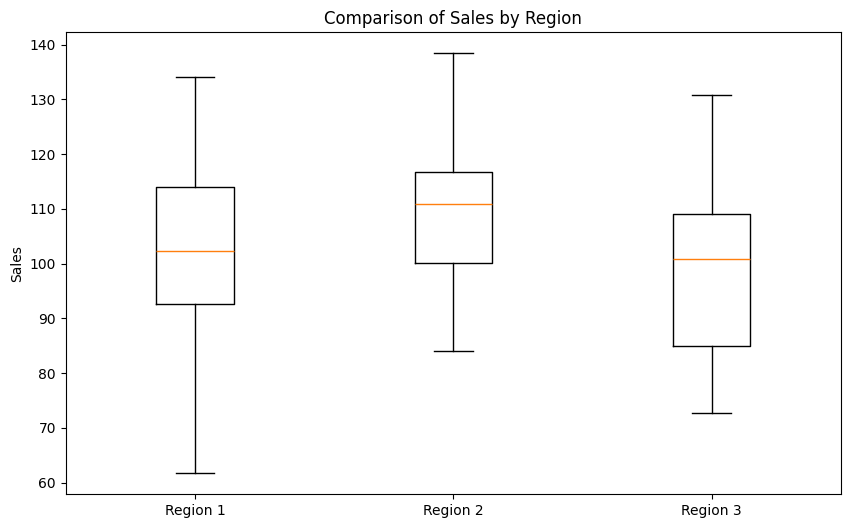

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate simulated data for three regions
np.random.seed(0)
region1 = np.random.normal(100, 15, 50)
region2 = np.random.normal(110, 15, 50)
region3 = np.random.normal(95, 15, 50)

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(region1, region2, region3)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of results
alpha = 0.05
if p_value < alpha:
    print("There are significant differences between the means of the regions.")
else:
    print("There is not enough evidence to conclude differences between the regions.")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.boxplot([region1, region2, region3], labels=['Region 1', 'Region 2', 'Region 3'])
plt.title("Comparison of Sales by Region")
plt.ylabel("Sales")
plt.savefig('./img/04_10.png')
plt.show()

# 4.3 Inférence statistique

## 4.3.1 Notion d'intervalle de confiance

In [22]:
# Simulate revenue data per client
np.random.seed(0)
revenues = np.random.normal(loc=100, scale=20, size=1000)

# Calculate the sample mean and standard deviation
sample_mean = np.mean(revenues)
sample_std_dev = np.std(revenues, ddof=1)

# Calculate the 95% confidence interval
sample_size = len(revenues)
margin_of_error = stats.t.ppf((1 + 0.95) / 2, df=sample_size-1) * (sample_std_dev / np.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample mean: {sample_mean:.2f}")
print("95% confidence interval: {:.2f}, {:.2f}".format(*confidence_interval))

Sample mean: 99.09
95% confidence interval: 97.87, 100.32


## 4.3.2 Principes des tests d'hypothèses

In [23]:
# Simulate data: time spent on the site (in minutes)
np.random.seed(0)
time_on_site = np.random.normal(loc=11, scale=2, size=100)

# Define hypotheses
# H0: The mean time is 10 minutes
# H1: The mean time is different from 10 minutes

# Perform the t-test
t_stat, p_value = stats.ttest_1samp(time_on_site, popmean=10)

# Interpret the results
alpha = 0.05
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: The mean time is significantly different from 10 minutes.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence to conclude that the mean time is different from 10 minutes.")

# Calculate the power of the test
effect_size = (np.mean(time_on_site) - 10) / np.std(time_on_site, ddof=1)
power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(time_on_site), alpha=alpha)
print(f"Power of the test: {power:.4f}")

T-statistic: 5.5265
P-value: 0.0000
Reject the null hypothesis: The mean time is significantly different from 10 minutes.
Power of the test: 0.9731


### 4.3.3.1 Test de normalité 

In [24]:
# Example data
data = np.random.normal(loc=0, scale=1, size=100)

# Apply the Shapiro-Wilk normality test
statistic, p_value = shapiro(data)

# Interpret the results
if p_value > 0.05:
    print("The data follows a normal distribution (p-value =", p_value, ")")
else:
    print("The data does not follow a normal distribution (p-value =", p_value, ")")


The data does not follow a normal distribution (p-value = 0.04156432925499036 )


### 4.3.3.2 Test t de Student

In [25]:
import numpy as np
from scipy import stats

# Simulate data for two groups
np.random.seed(0)
group1 = np.random.normal(loc=100, scale=15, size=50)
group2 = np.random.normal(loc=110, scale=15, size=50)

# Perform the Student's t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference between the means of the two groups.")
else:
    print("There is not enough evidence to conclude a difference between the means of the groups.")

T-statistic: -2.4889
P-value: 0.0145
There is a significant difference between the means of the two groups.


### 4.3.3.3 ANOVA à un facteur

In [26]:
import numpy as np
from scipy import stats

# Simulate data for three groups
np.random.seed(0)
group1 = np.random.normal(loc=100, scale=15, size=50)
group2 = np.random.normal(loc=105, scale=15, size=50)
group3 = np.random.normal(loc=110, scale=15, size=50)

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There are significant differences between the means of the groups.")
else:
    print("There is not enough evidence to conclude differences between the means of the groups.")


F-statistic: 8.0647
P-value: 0.0005
There are significant differences between the means of the groups.


### 4.3.4.1 Test de Mann-Whitney

In [27]:
import numpy as np
from scipy import stats

# Simulate data for two groups
np.random.seed(0)
group1 = np.random.exponential(scale=2, size=100)
group2 = np.random.exponential(scale=2.5, size=100)

# Perform the Mann-Whitney test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

print(f"Test statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is not enough evidence to conclude a difference between the groups.")

Test statistic: 3856.0000
P-value: 0.0052
There is a significant difference between the two groups.


### 4.3.4.2 Test de Kruskal-Wallis

In [28]:
import numpy as np
from scipy import stats

# Simulate data for three groups
np.random.seed(0)
group1 = np.random.normal(loc=100, scale=15, size=50)
group2 = np.random.normal(loc=105, scale=15, size=50)
group3 = np.random.normal(loc=95, scale=15, size=50)

# Perform the Kruskal-Wallis test
statistic, p_value = stats.kruskal(group1, group2, group3)

print(f"Test statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There are significant differences between the groups.")
else:
    print("There is not enough evidence to conclude differences between the groups.")


Test statistic: 3.5537
P-value: 0.1692
There is not enough evidence to conclude differences between the groups.


# 4.4 Techniques avancées d'analyse statistique

## 4.4.1 Régression linéaire simple et multiple

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     720.1
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           8.21e-80
Time:                        16:14:07   Log-Likelihood:                -119.52
No. Observations:                 160   AIC:                             245.0
Df Residuals:                     157   BIC:                             254.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9272      0.041     47.166      0.0

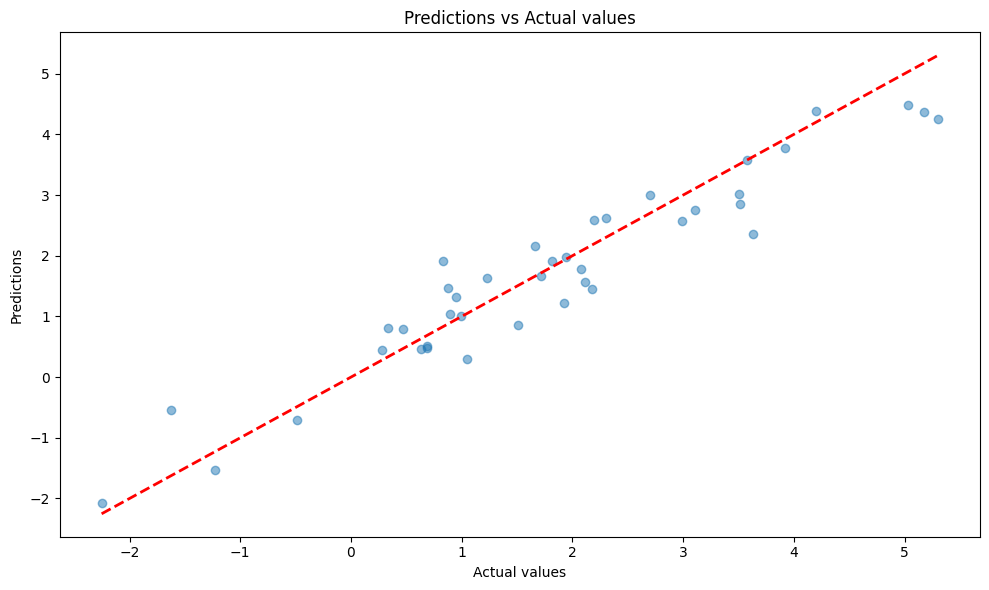

R² on the test set: 0.9017


In [29]:
# Generate synthetic data
np.random.seed(0)
X = np.random.randn(200, 2)
y = 2 + 0.5 * X[:, 0] + 1.5 * X[:, 1] + np.random.randn(200) * 0.5

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to X for the intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the model
model = sm.OLS(y_train, X_train_sm).fit()

# Print the model summary
print(model.summary())

# Predictions on the test set
y_pred = model.predict(X_test_sm)

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.title('Predictions vs Actual values')
plt.tight_layout()
plt.savefig('./img/04_11.png')
plt.show()

# Calculate and display R² on the test set
r2 = model.rsquared
print(f"R² on the test set: {r2:.4f}")

## 4.4.2 Predictive Power Score

PPS of x predicting y: 0.495
       x  y   ppscore        case  is_valid_score               metric  \
0      x  y  0.495474  regression            True  mean absolute error   
1  error  y  0.000000  regression            True  mean absolute error   

   baseline_score  model_score                    model  
0         1.07604     0.542890  DecisionTreeRegressor()  
1         1.07604     1.317269  DecisionTreeRegressor()  
       x      y   ppscore            case  is_valid_score  \
0      x      x  1.000000  predict_itself            True   
1      x  error  0.000000      regression            True   
2      x      y  0.495474      regression            True   
3  error      x  0.000000      regression            True   
4  error  error  1.000000  predict_itself            True   
5  error      y  0.000000      regression            True   
6      y      x  0.000000      regression            True   
7      y  error  0.000000      regression            True   
8      y      y  1.000000

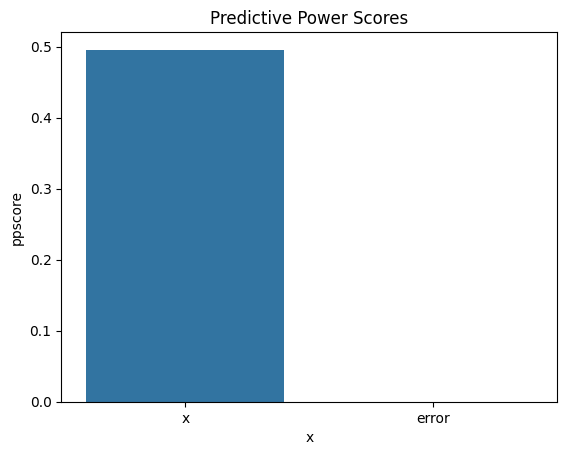

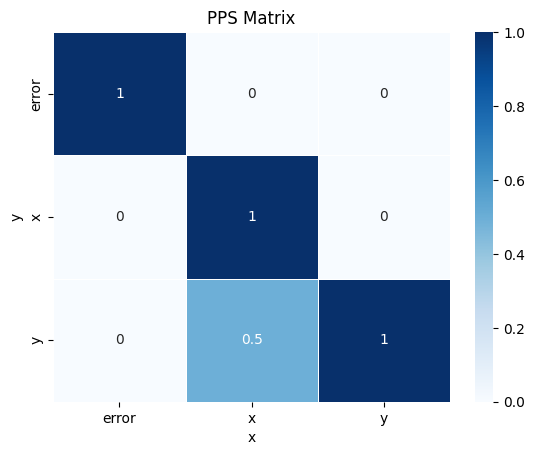

In [30]:
import ppscore as pps
import seaborn as sns

# Sample Data Creation
df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1000)  # Predictor variable
df["error"] = np.random.normal(0, 0.5, 1000) # Random noise
df["y"] = df["x"]**2 + df["error"]        # Target variable (quadratic relationship with x)

# Calculate PPS for a single predictor
ppscore_result = pps.score(df, "x", "y")
print(f'PPS of x predicting y: {ppscore_result["ppscore"]:.3f}')

# Calculate PPS for all predictors against a target
predictors_df = pps.predictors(df, y="y")
print(predictors_df)

# Calculate PPS matrix for all pairs of columns
matrix_df = pps.matrix(df)
print(matrix_df)

# Visualize PPS predictors
sns.barplot(data=predictors_df, x="x", y="ppscore")
plt.title("Predictive Power Scores")
plt.savefig('./img/04_12.png')
plt.show()

# Visualize PPS matrix (requires reshaping for seaborn)
matrix_df = matrix_df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title("PPS Matrix")
plt.savefig('./img/04_13.png')
plt.show()